# Laboratorio 7

* Asuma que las operaciones no requieren alta precisión.
* Presente su solución con el nombre `lab7_codigoPUCP.ipynb`

In [1]:
import numpy
ns = 2**numpy.arange(5,15)

a) Implementar (en un único archivo) cuatro funciones en C que acumule el producto interno de dos arreglos números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [2]:
%%file parte_a.c
#include <stdio.h>
#include <stdint.h>
double func_1(unsigned long long N, double *arr_1, double *arr_2){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i++){
        ac = ac + arr_1[i]*arr_2[i];
    }
    return ac;
}
double func_2(unsigned long long N, double *arr_1, double *arr_2){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i+=2){
        ac = ac + arr_1[i]*arr_2[i] + arr_1[i+1]*arr_2[i+1];
    }
    return ac;
}
double func_3(unsigned long long N, double *arr_1, double *arr_2){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i+=4){
        ac = ac + arr_1[i]*arr_2[i] + arr_1[i+1]*arr_2[i+1] + arr_1[i+2]*arr_2[i+2] + arr_1[i+3]*arr_2[i+3];
    }
    return ac;
}
double func_4(unsigned long long N, double *arr_1, double *arr_2){
    double ac = 0;
    for(unsigned long long i = 0; i < (N*N); i+=8){
        ac = ac + arr_1[i]*arr_2[i] + arr_1[i+1]*arr_2[i+1] + arr_1[i+2]*arr_2[i+2] + arr_1[i+3]*arr_2[i+3] + arr_1[i+4]*arr_2[i+4] + arr_1[i+5]*arr_2[i+5] + arr_1[i+6]*arr_2[i+6] + arr_1[i+7]*arr_2[i+7];
    }
    return ac;
}



Overwriting parte_a.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [3]:
! gcc -fPIC -shared parte_a.c -o parte_a.so

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [4]:

import ctypes

def llamado_c():
    lib =ctypes.CDLL("./parte_a.so")
    lib.func_1.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64), numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_1.restype = ctypes.c_double
    lib.func_2.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64), numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_2.restype = ctypes.c_double
    lib.func_3.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64), numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_3.restype = ctypes.c_double
    lib.func_4.argtypes = [ctypes.c_int64 , numpy.ctypeslib.ndpointer(dtype = numpy.float64), numpy.ctypeslib.ndpointer(dtype = numpy.float64)]
    lib.func_4.restype = ctypes.c_double
    return lib.func_1, lib.func_2, lib.func_3, lib.func_4

d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [5]:

funcion1, funcion2, funcion3, funcion4 = llamado_c()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. Completar la información para generar dos arreglos.(1.25 ptos)

In [6]:
n = ns[0]
A = numpy.random.rand(n,n)
B = numpy.random.rand(n,n)
a = A.flatten()
b = B.flatten()
print(funcion1(n,a,b))
print(funcion2(n,a,b))
print(funcion3 (n,a,b))
print(funcion4(n,a,b))
#Para elejir el tipo de dato, utilice la funcion type para saber que tipo de dato tienen los valores de entrada que voy a usar
print(type(n))
print(type(a[0]))

258.68812886654604
258.68812886654604
258.68812886654604
258.68812886654604
<class 'numpy.int64'>
<class 'numpy.float64'>


f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. Completar nuevamente los arreglos a y b (1.25 ptos)

In [7]:
n = ns[-1]
A = numpy.random.rand(n,n)
B = numpy.random.rand(n,n)
a = A.flatten()
b = B.flatten()
print(funcion1(n,a,b))
print(funcion2(n,a,b))
print(funcion3 (n,a,b))
print(funcion4(n,a,b))

67113739.22596088
67113739.22596088
67113739.22596088
67113739.22596088


g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [8]:
import time
import statistics
iter = 50
medianas_f1 = []
medianas_f2 = []
medianas_f3 = []
medianas_f4 = []
for n in ns:
    time_f1 = []
    time_f2 = []
    time_f3 = []
    time_f4 = []
    A = numpy.random.rand(n,n)
    B = numpy.random.rand(n,n)
    a = A.flatten()
    b = B.flatten()
    for i in range(iter):
        tic5 = time.perf_counter()
        funcion4(n,a,b)
        tic4 = time.perf_counter()
        funcion3(n,a,b)
        tic3 = time.perf_counter()
        funcion2(n,a,b)
        tic2 = time.perf_counter()
        funcion1(n,a,b)
        tic1 = time.perf_counter()
        time_f4.append((tic4-tic5))
        time_f3.append((tic3-tic4))
        time_f2.append((tic2-tic3))
        time_f1.append((tic1-tic2))
    medianas_f1.append(statistics.median(time_f1))
    medianas_f2.append(statistics.median(time_f2))
    medianas_f3.append(statistics.median(time_f3))
    medianas_f4.append(statistics.median(time_f4))

h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

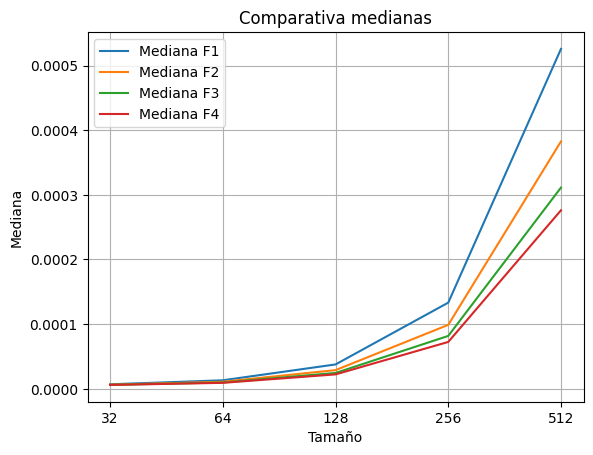

In [9]:
import matplotlib.pyplot as plt
plt_arr_f1 = []
plt_arr_f2 = []
plt_arr_f3 = []
plt_arr_f4 = []
plt_xlabel = []
for i in range(5):
    plt_arr_f1.append(medianas_f1[i])
    plt_arr_f2.append(medianas_f2[i])
    plt_arr_f3.append(medianas_f3[i])
    plt_arr_f4.append(medianas_f4[i])
    plt_xlabel.append(ns[i])
plt.plot(plt_arr_f1)
plt.plot(plt_arr_f2)
plt.plot(plt_arr_f3)
plt.plot(plt_arr_f4)
plt.grid()
plt.legend(["Mediana F1", "Mediana F2", "Mediana F3", "Mediana F4"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel)), plt_xlabel)
plt.ylabel("Mediana")
plt.show()
plt.close()

i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

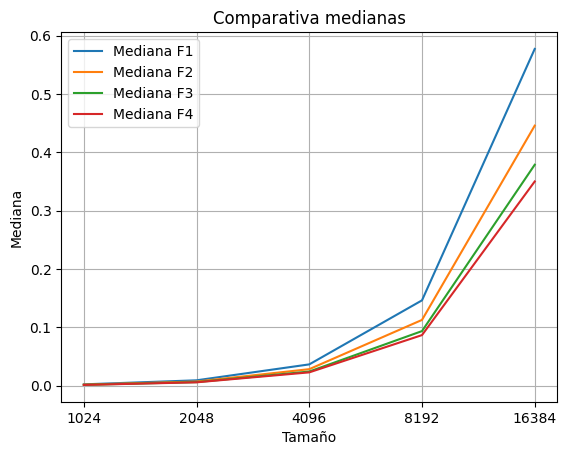

In [10]:
plt_arr_f1 = []
plt_arr_f2 = []
plt_arr_f3 = []
plt_arr_f4 = []
plt_xlabel_2 = []
for i in range(5):
    plt_arr_f1.append(medianas_f1[i+5])
    plt_arr_f2.append(medianas_f2[i+5])
    plt_arr_f3.append(medianas_f3[i+5])
    plt_arr_f4.append(medianas_f4[i+5])
    plt_xlabel_2.append(ns[i+5])
plt.plot(plt_arr_f1)
plt.plot(plt_arr_f2)
plt.plot(plt_arr_f3)
plt.plot(plt_arr_f4)
plt.grid()
plt.legend(["Mediana F1", "Mediana F2", "Mediana F3", "Mediana F4"])
plt.title("Comparativa medianas")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel_2)), plt_xlabel_2)
plt.ylabel("Mediana")
plt.show()
plt.close()

j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

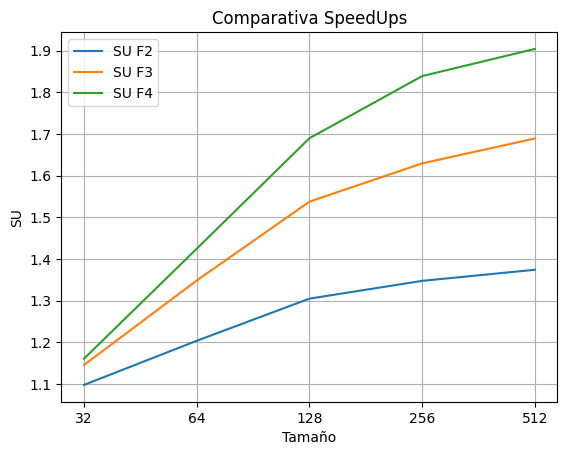

In [11]:
#F1 es la funcion mas lenta
SU1 = []
SU2 = []
SU3 = []
for i in range(5):
    SU1.append(medianas_f1[i]/medianas_f2[i])
    SU2.append(medianas_f1[i]/medianas_f3[i])
    SU3.append(medianas_f1[i]/medianas_f4[i])
plt.plot(SU1)
plt.plot(SU2)
plt.plot(SU3)
plt.grid()
plt.legend(["SU F2", "SU F3", "SU F4"])
plt.title("Comparativa SpeedUps")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel)), plt_xlabel)
plt.ylabel("SU")
plt.show()
plt.close()

k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

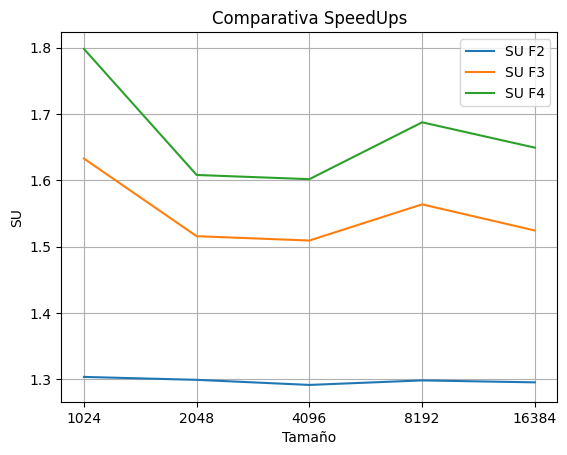

In [12]:
SU1 = []
SU2 = []
SU3 = []
for i in range(5):
    SU1.append(medianas_f1[i+5]/medianas_f2[i+5])
    SU2.append(medianas_f1[i+5]/medianas_f3[i+5])
    SU3.append(medianas_f1[i+5]/medianas_f4[i+5])
plt.plot(SU1)
plt.plot(SU2)
plt.plot(SU3)
plt.grid()
plt.legend(["SU F2", "SU F3", "SU F4"])
plt.title("Comparativa SpeedUps")
plt.xlabel("Tamaño")
plt.xticks(range(len(plt_xlabel_2)), plt_xlabel_2)
plt.ylabel("SU")
plt.show()
plt.close()

l) Extraer las características de la memoria caché de su computador (0.5)

In [13]:
! lscpu | grep "instance"

Caché L1d:                           256 KiB (8 instances)
Caché L1i:                           256 KiB (8 instances)
Caché L2:                            2 MiB (8 instances)
Caché L3:                            16 MiB (1 instance)


m) Explique sus resultados de las implementaciones empleando conceptos de memoria caché. (3.5 ptos)

Como se puede apreciar en las gráficas presentadas, la función cuyo tiempo medio es menor es la función 4, la cual agrupa elementos por bloques de 8. Esto se debe a que es la que aplica mejor los conceptos de localidad temporal. Al llamar elementos de la caché de 8 en 8, lo que hace es que por cada iteración de la función se busquen elementos que se ubican cerca(dentro de la caché), por lo que se accede más rápido a ellos. Si se compara, por ejemplo, con la función 1; esta llama a un solo elemento por iteración, lo cual causa que la cantidad de iteraciones sea mayor y, al aplicar la localidad temporal con un bloque considerablemente más pequeño que el de la función 4, empeora bastante la eficiencia de la funcion. En cuanto a las gráficas de los speedups, validan el punto mencionado; pues, la función que agrupa 2 en 2 (numero mas cercano a 1) presenta un speedup que, en comparación a las demás funciones, es bajo. No obstante, debido a la localiad temporal, sigue siendo más rapida que la funcion 1